In [1]:
import keras
from keras.datasets import cifar10
from keras.models import Sequential
from keras import datasets, layers, models
from keras.utils import np_utils
from keras import regularizers
from keras.layers import Dense, Dropout, BatchNormalization
import matplotlib.pyplot as plt
import numpy as np

2022-12-19 19:24:22.573128: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


(50000, 32, 32, 3)
(50000, 1)
(10000, 32, 32, 3)
(10000, 1)
[0 1 2 3 4 5 6 7 8 9]
[0 1 2 3 4 5 6 7 8 9]


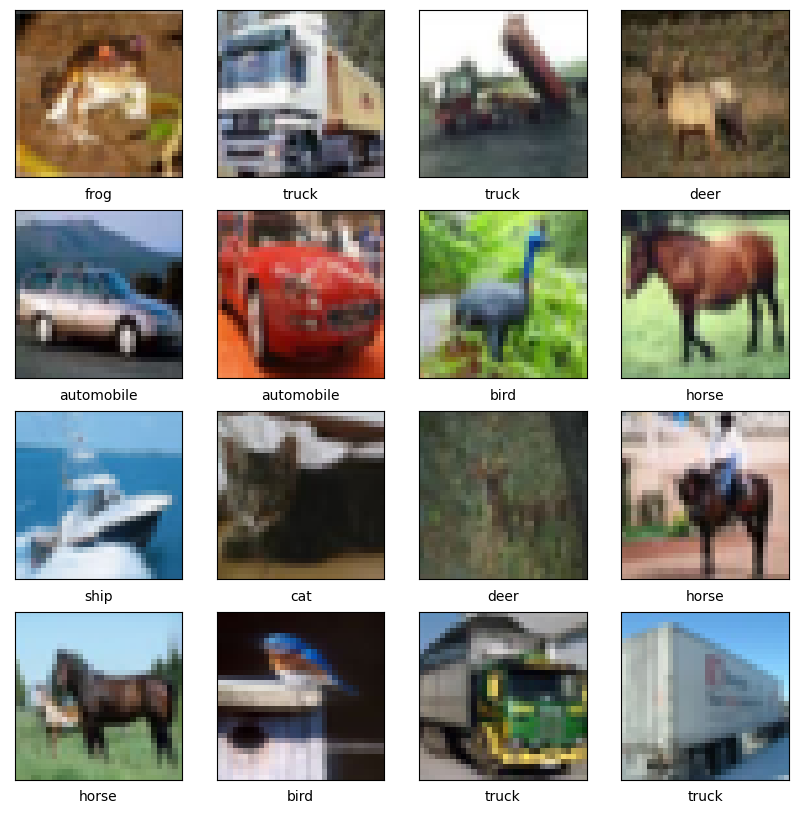

In [2]:
(x_train, y_train), (x_test, y_test)=datasets.cifar10.load_data()

#class names
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

#Show
def show():
    plt.figure(figsize=(10,10))
    for i in range(16):
        plt.subplot(4,4,i+1)
        plt.xticks([])
        plt.yticks([])
        plt.grid(False)
        plt.imshow(x_train[i])
        plt.xlabel(class_names[y_train[i][0]])
show()

# Checking the number of rows (records) and columns (features)
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

# Checking the number of unique classes 
print(np.unique(y_train))
print(np.unique(y_test))

In [3]:
from keras.utils import to_categorical

# Normalizing
x_train=x_train/255
x_test=x_test/255

#One hot encoding
y_train_cat=to_categorical(y_train,10)
y_test_cat=to_categorical(y_test,10)


In [4]:
model=Sequential()
model.add(layers.Conv2D(filters=32,kernel_size=(4,4),input_shape=(32,32,3),activation='relu'))
model.add(layers.MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.25)) # Drop 25% of the units from the layer.
model.add(layers.Conv2D(filters=32,kernel_size=(4,4),input_shape=(32,32,3),activation='relu'))
model.add(layers.MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.25))
model.add(layers.Flatten())
model.add(Dense(256,activation='relu'))
model.add(Dense(10,activation='softmax'))

model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

from keras.preprocessing.image import ImageDataGenerator
datagen = ImageDataGenerator(width_shift_range=0.1, height_shift_range=0.1, horizontal_flip=True,rotation_range=20)
it_train = datagen.flow(x_train,y_train_cat)
steps = int(x_train.shape[0] / 64)

# Checking the model summary
model.summary()

2022-12-19 19:24:28.705509: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 29, 29, 32)        1568      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 32)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 14, 14, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 32)        16416     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 32)         0         
 2D)                                                             
                                                                 
 dropout_1 (Dropout)         (None, 5, 5, 32)          0

In [5]:
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [6]:
#training
batch_size = 64
epoch = 10

history = model.fit(x_train, y_train_cat, epochs=epoch, batch_size=batch_size, validation_data=(x_test,y_test_cat))
# history = model.fit(it_train, epochs=epoch,steps_per_epoch=steps,validation_data=(x_test,y_test_cat))

Epoch 1/10
782/782 [==============================] - 28s 35ms/step - loss: 1.6104 - accuracy: 0.4141 - val_loss: 1.3434 - val_accuracy: 0.5174
Epoch 2/10
782/782 [==============================] - 26s 34ms/step - loss: 1.2833 - accuracy: 0.5435 - val_loss: 1.2561 - val_accuracy: 0.5583
Epoch 3/10
782/782 [==============================] - 27s 34ms/step - loss: 1.1718 - accuracy: 0.5862 - val_loss: 1.1065 - val_accuracy: 0.6108
Epoch 4/10
782/782 [==============================] - 26s 34ms/step - loss: 1.0744 - accuracy: 0.6200 - val_loss: 1.0100 - val_accuracy: 0.6452
Epoch 5/10
782/782 [==============================] - 26s 34ms/step - loss: 1.0045 - accuracy: 0.6481 - val_loss: 0.9829 - val_accuracy: 0.6569
Epoch 6/10
782/782 [==============================] - 26s 34ms/step - loss: 0.9451 - accuracy: 0.6704 - val_loss: 0.9393 - val_accuracy: 0.6729
Epoch 7/10
782/782 [==============================] - 26s 34ms/step - loss: 0.8906 - accuracy: 0.6888 - val_loss: 0.8847 - val_accuracy:

In [7]:
evaluation = model.evaluate(x_test, y_test_cat, verbose=2)
print('Test Accuracy: {}'.format(evaluation[1]))

313/313 - 1s - loss: 0.8665 - accuracy: 0.6955 - 1s/epoch - 3ms/step
Test Accuracy: 0.6955000162124634


<AxesSubplot:>

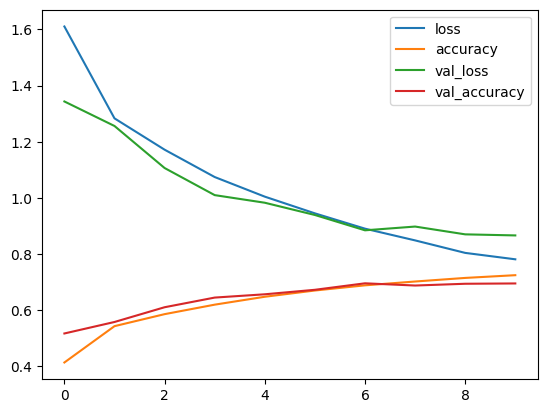

In [8]:
# Plotting train vs validation
import pandas as pd
pd.DataFrame(history.history).plot()

In [9]:
# Prediction
from keras.preprocessing import image
from keras.models import load_model

print(class_names)

for i, im in enumerate(class_names):
    img = image.image_utils.load_img(f"test_images/{im}.jpg", target_size=(32,32))
    img = image.image_utils.img_to_array(img)
    img = img.reshape((1,) + img.shape)
    img = img/255.

    y_prob = model.predict(img)
    y_classes = y_prob.argmax(axis=-1)
    pred = class_names[y_classes[0]] 
    if pred == im:
        print(True, pred)
    else: 
        print(False, pred, "Actual:", im)




['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
1/1 [==============================] - 0s 100ms/step
True airplane
1/1 [==============================] - 0s 19ms/step
False truck Actual: automobile
1/1 [==============================] - 0s 19ms/step
True bird
1/1 [==============================] - 0s 19ms/step
True cat
1/1 [==============================] - 0s 19ms/step
False airplane Actual: deer
1/1 [==============================] - 0s 18ms/step
True dog
1/1 [==============================] - 0s 18ms/step
True frog
1/1 [==============================] - 0s 18ms/step
True horse
1/1 [==============================] - 0s 18ms/step
True ship
1/1 [==============================] - 0s 18ms/step
True truck
